In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import backend
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = r'C:\Users\mypc\Desktop\Untitled Folder\color-recognition\Dataset\train\data'
validation_data_dir = r'C:\Users\mypc\Desktop\Untitled Folder\color-recognition\Dataset\test\data'

In [3]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

Found 4069 images belonging to 3 classes.
Found 125 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(3))
model.add(Activation('softmax'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(3))
model.add(Activation('softmax'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(3))
model.add(Activation('softmax'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(3))
model.add(Activation('softmax'))

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
nb_epoch = 8
nb_train_samples = 4069
nb_validation_samples = 125

In [7]:
model.fit_generator(
        train_generator,
        samples_per_epoch= nb_train_samples,
        nb_epoch=nb_epoch,
        verbose=1,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, validation_data=<keras.pre..., steps_per_epoch=254, epochs=8, validation_steps=125)`
  import sys


Epoch 1/8
254/254 [==============================] - 579s 2s/step - loss: 0.7989 - accuracy: 0.5996 - val_loss: 0.3788 - val_accuracy: 0.9166
Epoch 2/8
254/254 [==============================] - 487s 2s/step - loss: 0.3817 - accuracy: 0.8478 - val_loss: 0.1587 - val_accuracy: 0.9273
Epoch 3/8
254/254 [==============================] - 448s 2s/step - loss: 0.2409 - accuracy: 0.9198 - val_loss: 0.0109 - val_accuracy: 0.9836
Epoch 4/8
254/254 [==============================] - 452s 2s/step - loss: 0.1774 - accuracy: 0.9479 - val_loss: 1.4839 - val_accuracy: 0.7746
Epoch 5/8
254/254 [==============================] - 445s 2s/step - loss: 0.1774 - accuracy: 0.9479 - val_loss: 0.0112 - val_accuracy: 0.9836
Epoch 6/8
254/254 [==============================] - 462s 2s/step - loss: 0.1330 - accuracy: 0.9669 - val_loss: 0.1390 - val_accuracy: 0.9749
Epoch 7/8
254/254 [==============================] - 453s 2s/step - loss: 0.1471 - accuracy: 0.9694 - val_loss: 0.0514 - val_accuracy: 0.9759
Epoch 

In [8]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 74, 74, 3)         99        
_________________________________________________________________
activation_2 (Activation)    (None, 74, 74, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 72, 72, 32)       

In [10]:
color_list = ['Blue' , 'Red' ,'Green']

In [11]:
def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(150, 150))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        color_list.sort()
        pred_value = color_list[index]
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

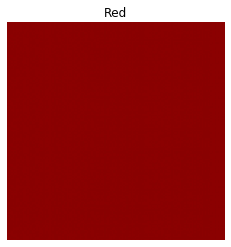

In [13]:
images = []
# images.append('1.png')
# images.append('2.jpg')
images.append(r'C:\Users\mypc\Desktop\Untitled Folder\color-recognition\Dataset\test\data\red\red.2.jpg')
predict_class(model, images, True)

In [9]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.005147529765963554, 0.9739130139350891]

In [14]:
model.save("color_model_lp3.h5")
